# Using Agg and Resample with Temporal Data

This Jupyter notebook demonstrates the use of Pandas for temporal data, as discussed in the blog post. We will load a sample dataset, perform aggregation and resampling, and calculate key business indicators. Additionally, we'll visualize our findings with charts to make our analysis more insightful.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the demo dataset
df = pd.read_csv('demo_data_for_blog_post.csv', parse_dates=['transaction_date'])
df.head()


,transaction_date,sales_amount,traffic,revenue,churn_rate
0,2023-01-01,103.63,1143.0,267.43,0.0207
1,2023-01-02,135.31,1194.0,278.04,0.0280
2,2023-01-03,144.69,1042.0,221.76,0.0251
3,2023-01-04,113.70,1060.0,229.97,0.0289
4,2023-01-05,142.68,1117.0,202.40,0.0285


## Aggregating Data with `agg` Function

In [2]:
# Aggregating sales data by month
monthly_sales = df.groupby(pd.Grouper(key='transaction_date', freq='M')).agg({'sales_amount': 'sum'})

# Display the aggregated data
monthly_sales.head()


,sales_amount
transaction_date,
2023-01-31,3947.87
2023-02-28,3520.94
2023-03-31,3911.77
2023-04-30,3650.38
2023-05-31,3822.44


## Resampling Data

In [3]:
# Resampling traffic data to get the average daily traffic per month
monthly_traffic = df.resample('M', on='transaction_date').agg({'traffic': 'mean'})

# Display the resampled data
monthly_traffic.head()


,traffic
transaction_date,
2023-01-31,1099.516129
2023-02-28,1107.178571
2023-03-31,1079.096774
2023-04-30,1113.333333
2023-05-31,1095.290323


## Calculating Key Business Indicators

In [4]:
# Calculating Day Over Day (DoD) change in traffic
df['DoD_change'] = df['traffic'].pct_change()

# Display the calculated DoD changes
df[['transaction_date', 'traffic', 'DoD_change']].head()


,transaction_date,traffic,DoD_change
0,2023-01-01,1143.0,NaN
1,2023-01-02,1194.0,0.044619
2,2023-01-03,1042.0,-0.127303
3,2023-01-04,1060.0,0.017274
4,2023-01-05,1117.0,0.053774


## Visualizing the Analysis

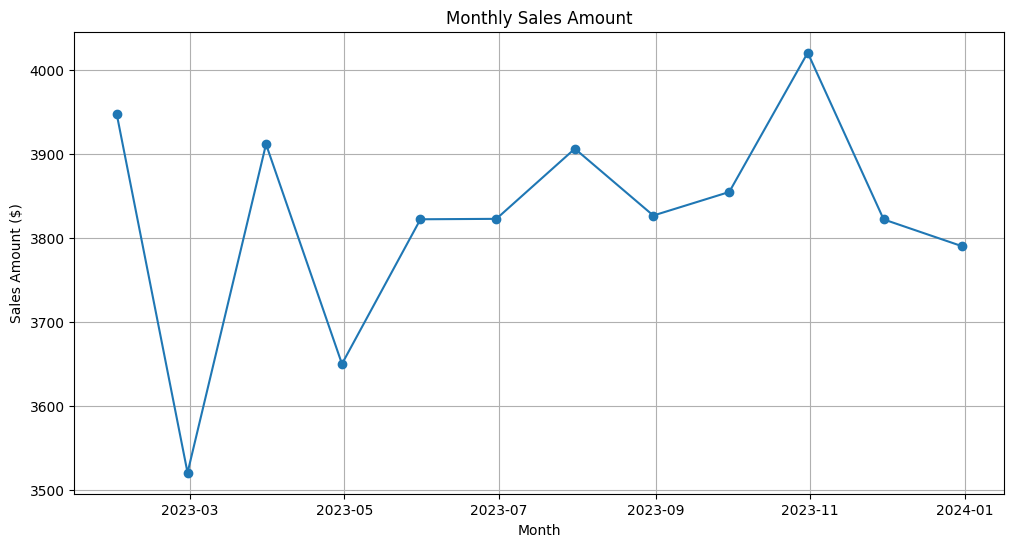

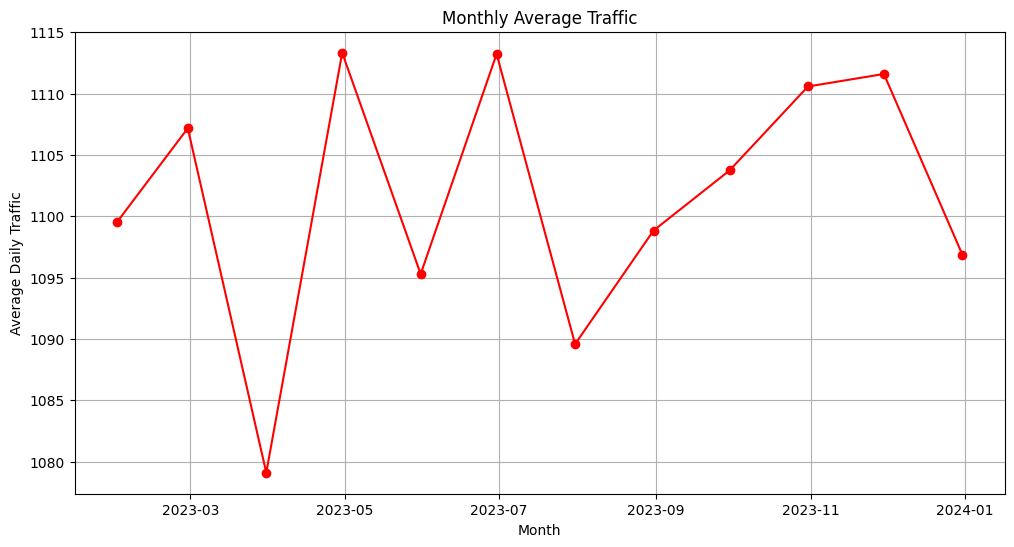

In [5]:
# Plotting monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['sales_amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Amount')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.grid(True)
plt.show()

# Plotting monthly average traffic
plt.figure(figsize=(12, 6))
plt.plot(monthly_traffic.index, monthly_traffic['traffic'], color='red', marker='o', linestyle='-')
plt.title('Monthly Average Traffic')
plt.xlabel('Month')
plt.ylabel('Average Daily Traffic')
plt.grid(True)
plt.show()
